# Parte 1 - Resolvendo um  Problema Linearmente Separável

> Autor: Jonatas Travessa Souza de Barros - 1935310001

> Autor: Franscisco Arcos Filho - 1215080042

## Importação das bibliotecas

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import random
import os

## Leitura do arquivo dataAll.txt com numpy

In [4]:
dataAll = np.fromfile('dataAll.txt')
print(dataAll)

[-363.7884  244.1423    0.     ... -140.147   734.0983    0.    ]


### Vendo o formato inicial do array

In [5]:
dataAll.shape

(3000,)

#### Sendo 3000 valores, significa que há 1000 exemplos, visto que cada exemplo é representado por (x1, x2, yd). Logo, vamos transformar o array para representar os exemplos.

In [6]:
dataAll = dataAll.reshape(1000, 3)
print(dataAll)

[[-363.7884  244.1423    0.    ]
 [ 328.7572 -256.7658    1.    ]
 [-164.9827  613.2164    0.    ]
 ...
 [ 872.4311  669.1192    1.    ]
 [ 822.6894 -702.6489    1.    ]
 [-140.147   734.0983    0.    ]]


## Algoritmo de treinamento do Perceptron

#### Assim como na especificação da atividade será utilizada uma função degrau com valor de theta igual a 0 e uma taxa de aprendizado = 0,1 e também um viés.

In [7]:
theta = 0.0
n = 0.1
bias = -1.0

#### O vetor inicial de pesos deve ter seus valores inicializados conforme uma variável aleatória de distribuição uniforme no intervalo, isto é, wi ∼ U(−0,5, + 0,5). O vetor inicial de pesos deve ser impresso no início da execução do algoritmo. Além disso, será considerado precisão de 4 casas decimais

In [20]:
weights = np.random.uniform(-0.5, 0.5, size=(3, ))
weights = np.round(weights, 4)
weights

array([ 0.0398,  0.4776, -0.3683])

#### processo de aprendizado

In [21]:
epochs = 0
u = 0
adjust_total = 0
erros_in_epoch = 1000

while (erros_in_epoch != 0):
    epochs += 1
    adjust_in_epoch = 0
    erros_in_epoch = 0
    
    for example in dataAll:
        fu = 0.0
        u = weights[0]*bias + weights[1]*example[0] + weights[2]*example[1]
        if u >= theta:
            fu = 1.0
        else:
            fu = 0.0
        u = 0.0
        
        if fu != example[2]:
            adjust_in_epoch += 1
            adjust_total += 1
            erros_in_epoch += 1
            weights = weights + n*(example[2] - fu)*np.array([bias, example[0], example[1]])
            weights = np.round(weights, 4)
            print("Vetor de pesos ajustado, novo vetor de pesos")
            np.set_printoptions(precision=4, suppress=True)
            print(weights)
            print("")
            
    print("Número de ajustes do vetor de pesos na época", epochs, ":", adjust_in_epoch)
    print("")
    
print("Número total de ajustes do vetor de pesos:", adjust_total)


Vetor de pesos ajustado, novo vetor de pesos
[  0.1398 -30.9454 -34.752 ]

Vetor de pesos ajustado, novo vetor de pesos
[ 0.0398 41.8506  1.0776]

Vetor de pesos ajustado, novo vetor de pesos
[ -0.0602  43.0038 -57.7704]

Vetor de pesos ajustado, novo vetor de pesos
[ -0.1602 125.6025  22.0854]

Vetor de pesos ajustado, novo vetor de pesos
[ -0.0602 131.4483 -56.2092]

Vetor de pesos ajustado, novo vetor de pesos
[   0.0398   91.4394 -134.1019]

Vetor de pesos ajustado, novo vetor de pesos
[  0.1398 149.8823 -92.5216]

Vetor de pesos ajustado, novo vetor de pesos
[   0.0398   96.9222 -149.3911]

Vetor de pesos ajustado, novo vetor de pesos
[  0.1398 156.4817 -99.2688]

Vetor de pesos ajustado, novo vetor de pesos
[   0.0398  110.9571 -164.9047]

Vetor de pesos ajustado, novo vetor de pesos
[   0.1398  166.6103 -127.3299]

Vetor de pesos ajustado, novo vetor de pesos
[   0.0398  108.8293 -187.638 ]

Vetor de pesos ajustado, novo vetor de pesos
[   0.1398  141.2972 -166.1852]

Vetor de p

## Resultados

#### O número total de ajustes do vetor de pesos foi de 33
#### O número de épocas até a convergência foi de 2

### Cáculo da reta solução a partir dos pesos encontrados

In [22]:
#Equação da reta: x2 = (weights[0]/weights[2]) - (weights[1]/weights[2])*x1

#Encontrando dois pontos para obter a reta

#para x1 igual a 1000:
x2_1 = weights[0]/weights[2] - (weights[1]/weights[2])*1000

#para x1 igual a -1000:
x2_2 = weights[0]/weights[2] - (weights[1]/weights[2])*(-1000)


### Gráfico do conjunto de dados e a reta que separa as classes

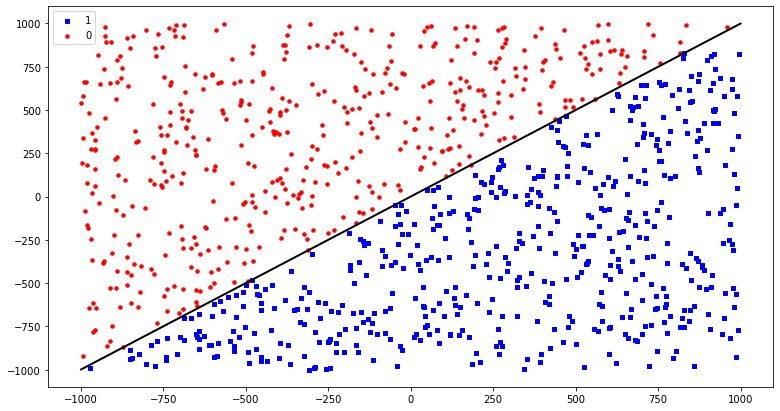

In [28]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in dataAll:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 12
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')
plt.legend(loc='upper left')
plt.plot([1000, -1000],[x2_1, x2_2], color='black', linewidth=2)
plt.show()